# Setup

Download the CELLEX repository and data.

In [1]:
# Install CELLEX to your env
# !pip install cellex

In [2]:
# macOS
# !curl -O https://storage.googleapis.com/linnarsson-lab-loom/l6_r1_vascular_cells.loom

# Linux
# !wget https://storage.googleapis.com/linnarsson-lab-loom/l6_r1_vascular_cells.loom

# Import packages
N.B. If you are missing any dependencies in your environment, your imports will fail until all dependencies are installed.

In [3]:
import loompy # needed for importing data for this tutorial
import numpy as np # needed for formatting data for this tutorial
import pandas as pd # needed for formatting data for this tutorial
import cellex

# Set constants

In [4]:
### Set constants
dirOut = "cellex_demo_out" # output directory for results and plots
prefixData = "mousebrain_vascular_cells" # prefix to prepend to files

pathData = "./l6_r1_vascular_cells.loom"
pathData = "/scratch/l6_r2_vascular_cells.loom"
nameAnno = "ClusterName" # metadata annotation column attribute name
nameId = "CellID" # metadata cell id column attribute name
nameClass = "Class"

# Import and format data

Cellex takes Pandas dataframes as input. These must conform to a certain format. See the output below.

## Data
N.B. This dataset contains a few duplicate cells. Thus some additional data wrangling is necessary.

In [5]:
with loompy.connect(pathData) as ds:
    rows = (ds.row_attrs["Accession"])
    cols = (ds.col_attrs[nameId])
    
    data = pd.DataFrame(ds[:, :], index=rows, columns=cols)
    metadata = pd.DataFrame(data={"cell_type" : ds.col_attrs[nameAnno]}, index=ds.col_attrs[nameId])
    metadata_class = pd.DataFrame(data={"cell_class" : ds.col_attrs[nameClass]}, index=ds.col_attrs[nameAnno])
    n_cells_total = data.shape[1]
    
    # Handle duplicate CellID's in dataset
    data = data.loc[:, ~data.columns.duplicated()] # our data
    metadata = metadata.loc[~metadata.index.duplicated(keep='first')] # the type-annotation for individual cells
    metadata_class = metadata_class.loc[~metadata_class.index.duplicated(keep='first')] # class-annotation for cell types
    n_types = len(np.unique(metadata["cell_type"].values))
    
    n_cells_remaining = data.shape[1]
    print("Removed duplicates from data and metadata. {} / {} cells remaining.".format(n_cells_remaining, n_cells_total))
    print("Metadata contains {} unique cell-type annotations.".format(n_types))


Removed duplicates from data and metadata. 12144 / 12147 cells remaining.
Metadata contains 10 unique cell-type annotations.


In [6]:
data.head()

,10X01_1_GACGATTGTGCGTA-1,10X28_4_GATTGGACGCTGTA-1,10X05_2_CATTGGGAAGCCTA-1,10X01_1_GAGCGCACCCAAGT-1,10X28_5_GTTGTACTTACTCT-1,10X01_1_GGCCACGAGTATGC-1,10X01_1_GAGGCCACCGGGAA-1,10X57_3_AGATGATCCTGC-,10X55_4_AGCAAAGAAGAAGC-,10X57_3_TGTGACAGAAGT-,...,10X53_4_GATGGAATCACG-,10X51_3_GCATGAAACGTC-,10X50_8_TTAGACATCAGC-,10X52_3_CAGTGAACTTTC-,10X20_3_TGAGACACCAGAGG-1,10X51_4_GGTGACTGAAGA-,10X52_3_ACTTGACTGAGT-,10X28_2_GTTAAATGTGGTCA-1,10X50_4_AGCTCTTTTGTC-,10X50_1_GGAGTGCCAAGT-
ENSMUSG00000034353,12.0,9.0,8.0,18.0,4.0,7.0,8.0,24.0,5.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSMUSG00000019872,2.0,1.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0
ENSMUSG00000026051,27.0,1.0,13.0,41.0,0.0,1.0,4.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSMUSG00000023046,7.0,26.0,2.0,16.0,7.0,12.0,8.0,11.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSMUSG00000089661,7.0,3.0,2.0,5.0,5.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Metadata
N.B. Index values must be unique, like the cells.

In [7]:
metadata.head()

,cell_type
10X01_1_GACGATTGTGCGTA-1,ABC
10X28_4_GATTGGACGCTGTA-1,ABC
10X05_2_CATTGGGAAGCCTA-1,ABC
10X01_1_GAGCGCACCCAAGT-1,ABC
10X28_5_GTTGTACTTACTCT-1,ABC


# Create `ESObject` and compute Expression Specificity

The `ESObject` encapsulates the core features of CELLEX. We set `verbose=True` to get some progress reports.

N.B. the computations may take a while depending on the data and available computational power.

In [8]:
eso = cellex.ESObject(data=data, annotation=metadata, verbose=True)

Preprocessing - running remove_non_expressed ... excluded 8944 / 27998 genes in 0 min 3 sec
Preprocessing - normalizing data ... data normalized in 0 min 21 sec
Preprocessing - running ANOVA ... excluded 9835 / 19054 genes in 0 min 22 sec


In [9]:
eso.compute(verbose=True)

Computing DET ... 
    esw ...
    empirical p-values ...
    esw_s ...
    finished in 0 min 5 sec
Computing EP ...
    esw ...
    empirical p-values ...
    esw_s ...
    finished in 0 min 0 sec
Computing GES ...
    esw ...
    empirical p-values ...
    esw_s ...
    finished in 0 min 11 sec
Computing NSI ...
    esw ...
    empirical p-values ...
    esw_s ...
    finished in 0 min 0 sec
Computing ESmu ...
    finished in 0 min 0 sec
Computing ESsd ...
    finished in 0 min 0 sec
Computed ['det.esw', 'det.esw_null', 'det.pvals', 'det.esw_s', 'ep.esw', 'ep.esw_null', 'ep.pvals', 'ep.esw_s', 'ges.esw', 'ges.esw_null', 'ges.pvals', 'ges.esw_s', 'nsi.esw', 'nsi.esw_null', 'nsi.pvals', 'nsi.esw_s', 'esmu', 'essd'].


In [10]:
eso.results["esmu"].head()

,ABC,PER1,PER2,PER3,VECA,VECC,VECV,VLMC1,VLMC2,VSMCA
ENSMUSG00000034353,0.685475,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.265257,0.659205
ENSMUSG00000019872,0.296735,0.125344,0.0,0.0,0.0,0.0,0.859903,0.0,0.000000,0.000000
ENSMUSG00000026051,0.860563,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.201285,0.000000
ENSMUSG00000023046,0.755779,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.432777,0.000000
ENSMUSG00000089661,0.925753,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000


# (Optional) Map mouse Ensembl gene id's to human Ensembl gene id's

N.B. Genes are mapped in-place.

In [11]:
cellex.utils.mapping.ens_mouse_to_ens_human(eso.results["esmu"], drop_unmapped=True, verbose=True)
cellex.utils.mapping.ens_human_to_symbol(eso.results["esmu"], drop_unmapped=True, verbose=True)

cellex.utils.mapping.ens_mouse_to_ens_human(eso.results["essd"], drop_unmapped=True, verbose=True)
cellex.utils.mapping.ens_human_to_symbol(eso.results["essd"], drop_unmapped=True, verbose=True)

Mapping: mouse ensembl gene id's --> human ensembl gene id's ...
12.62 pct of genes are unmapped ...
Removed 1163 unmapped genes ...
Mapping: human ensembl gene id's --> gene names ...
0.52 pct of genes are unmapped ...
Removed 42 unmapped genes ...
Mapping: mouse ensembl gene id's --> human ensembl gene id's ...
12.62 pct of genes are unmapped ...
Removed 1163 unmapped genes ...
Mapping: human ensembl gene id's --> gene names ...
0.52 pct of genes are unmapped ...
Removed 42 unmapped genes ...


In [12]:
eso.results["esmu"].head()

,ABC,PER1,PER2,PER3,VECA,VECC,VECV,VLMC1,VLMC2,VSMCA
RAMP1,0.685475,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.265257,0.659205
SMPDL3A,0.296735,0.125344,0.0,0.0,0.0,0.0,0.859903,0.0,0.000000,0.000000
C2orf40,0.860563,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.201285,0.000000
IGFBP6,0.755779,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.432777,0.000000
CLU,0.679272,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.205419,0.000000


In [13]:
eso.results["essd"].head()

,ABC,PER1,PER2,PER3,VECA,VECC,VECV,VLMC1,VLMC2,VSMCA
RAMP1,0.369829,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.272675,0.244247
SMPDL3A,0.215842,0.13058,0.0,0.0,0.0,0.0,0.068965,0.0,0.000000,0.000000
C2orf40,0.168793,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.211099,0.000000
IGFBP6,0.312263,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.433928,0.000000
CLU,0.376603,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.205428,0.000000


# Save results to disk
N.B. by default, only ESmu is saved.

Function signature: `eso.save_as_csv(keys: list=None, path: str=None, file_prefix: str=None, verbose: bool=False)`


`keys`
* Using 'keys', the user may specify which results are saved.

* If keys is None, only ESmu is saved.

* If keys contains the keyword: "all", all results are saved.

`path`
* dir_name defaults to "out"

* To save in the current working directory, pass dir_name="."

`file_prefix`

* Prefix is appended to the saved files.


In [14]:
eso.save_as_csv(path=dirOut, file_prefix=prefixData, verbose=True)

Saving results as csv to disk ...
  Saved: cellex_demo_out/mousebrain_vascular_cells.esmu.csv.gz
  Saved: cellex_demo_out/mousebrain_vascular_cells.essd.csv.gz
Finished saving results to cellex_demo_out


# Plot results

CELLEX provides a handful of plotting features for quick visualization of results. Below we plot the top 5 ES genes for each cell-type.

In [15]:
df_esmu = eso.results["esmu"].copy()
es_max_genes = [(df_esmu.nlargest(n=5, columns=[col]).index.values) for col in df_esmu]
genes_to_plot = list(set(np.array(es_max_genes).flatten().tolist())) # set() removes duplicates

In [16]:
df_esmu.loc[genes_to_plot].head()

,ABC,PER1,PER2,PER3,VECA,VECC,VECV,VLMC1,VLMC2,VSMCA
PTPRB,0.000000,0.834405,0.166289,0.000000,0.468753,0.000000,0.723654,0.0,0.000000,0.000000
RNF183,0.000000,0.000000,0.750504,0.000000,0.000000,0.989328,0.000000,0.0,0.000000,0.000000
GBX1,0.000000,0.235875,0.329709,0.936908,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
WFIKKN2,0.297543,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.975723,0.000000
CNN1,0.000000,0.000000,0.000000,0.002340,0.000000,0.000000,0.000000,0.0,0.000000,0.984298


In [17]:
### Uncomment this step to see that all marker genes were originally in the raw data
#all_genes = pd.DataFrame(index=rows)
#cellex.utils.mapping.ens_mouse_to_ens_human(all_genes, drop_unmapped=True, verbose=True)
#cellex.utils.mapping.ens_human_to_symbol(all_genes, drop_unmapped=True, verbose=True)
#all_genes.loc[genes_to_plot]

## `profile_gene` plot

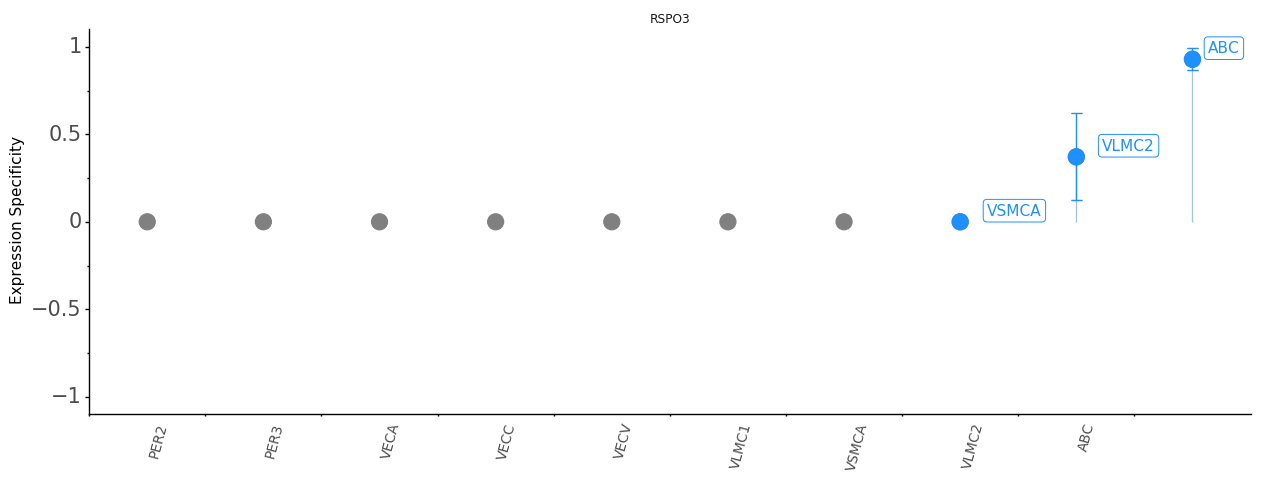

<ggplot: (8788203319623)>

In [18]:
p_esmu = cellex.plotting.gene_profile(genes=["RSPO3"], weights=eso.results["esmu"], stddev=eso.results["essd"], highlight_n=3)
p_esmu

# `heatmap` plot
N.B. It is advisable to select a limited number of genes and annotations. Heatmaps generated for the full dataset are tough on the eyes!

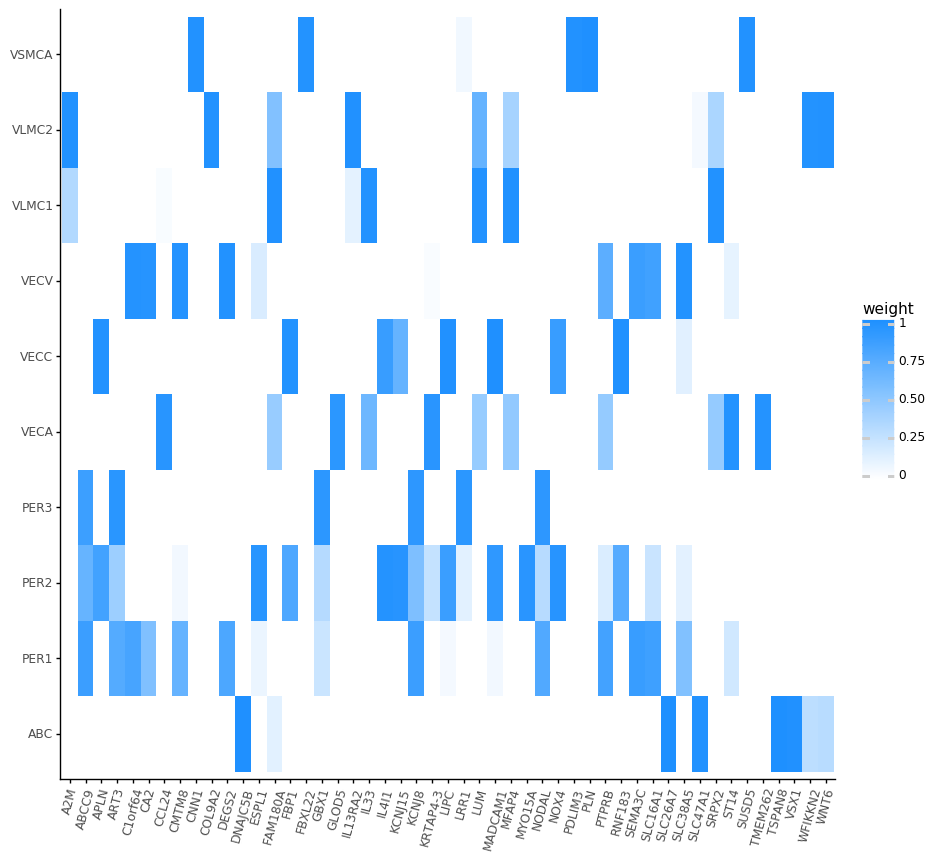

<ggplot: (8788203320114)>

In [19]:
p_heatmap = cellex.plotting.heatmap(df_esmu, genes=genes_to_plot)
p_heatmap

# `n_es_genes` plot

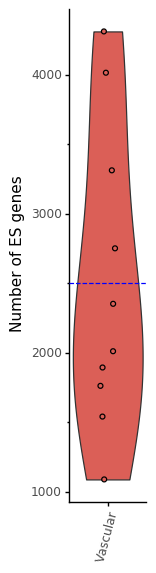

<ggplot: (-9223363248651692000)>

In [20]:
cellex.plotting.n_es_genes(df_esmu, annotation=metadata_class)

# Save plots to disk

In [21]:
fp = "{}/{}.esmu.heatmap.pdf".format(dirOut, prefixData)
cellex.plotting.save_as_pdf(p_heatmap, filename=fp, path=dirOut, dpi=600, verbose=True)

Saved: cellex_demo_out/mousebrain_vascular_cells.esmu.heatmap.pdf


In [22]:
# delete ESObject when the notebook is completed to release memory
del eso